<a href="https://colab.research.google.com/github/LuisEduardoRB/EDP-II/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Programa en Python para la construcción simbólica, evaluación numérica y visualización de soluciones aproximadas y exactas usando SymPy, NumPy y Matplotlib

### Bloque 1: Definiciones simbólicas y sistema para $\\alpha_i$

En este bloque se definen las variables simbólicas, las funciones base senoidales y las ecuaciones que determinan los coeficientes $\\alpha_i$ usando SymPy.

  
**Variables simbólicas**

`x = sp.symbols('x', real=True)`  

Crea la variable simbólica $x$, tratada como variable real.  
Se usa como variable independiente en todas las expresiones simbólicas.

  
`alpha1, alpha2, alpha3 = sp.symbols('alpha1 alpha2 alpha3', real=True)`  

Crea tres parámetros simbólicos reales $\\alpha_1,\\alpha_2,\\alpha_3$.  
Son las incógnitas que aparecerán en el sistema de ecuaciones.

  
**Funciones base senoidales**

`phi1 = sp.sin(sp.pi*x)`  

`phi2 = sp.sin(2*sp.pi*x)`  

`phi3 = sp.sin(3*sp.pi*x)`  

- `sp.sin` define el seno simbólico.  
- `sp.pi` es la constante $\\pi$ de SymPy.  

Cada `phi` es una función simbólica de $x$.

  
**Combinación lineal**

`u_g = alpha1*phi1 + alpha2*phi2 + alpha3*phi3`  

Construye una expresión simbólica que depende de $x$ y de los parámetros $\\alpha_i$.  
Las operaciones de suma y producto son simbólicas, no numéricas.

  
**Residual de la ecuación**

`R = -sp.diff(u_g, x, 2) + u_g - x`  

- `sp.diff(u_g, x, 2)` calcula la segunda derivada simbólica de `u_g` respecto a $x$.  
- El signo menos delante implementa el término $-u''$.  
- `+ u_g` agrega el término $u$.  
- `- x` agrega el término $-x$.  

El resultado `R` es una expresión simbólica en función de $x$ y de $\\alpha_i$.

  
**Integrales simbólicas**

`eq1 = sp.integrate(R*phi1, (x, 0, 1))`  

`eq2 = sp.integrate(R*phi2, (x, 0, 1))`  

`eq3 = sp.integrate(R*phi3, (x, 0, 1))`  

- `sp.integrate(expr,(x,0,1))` integra simbólicamente la expresión `expr` respecto a $x$ entre $0$ y $1$.  
- La multiplicación `R*phi1` etc. se hace simbólicamente.  

Cada `eq` es una expresión que depende solo de $\\alpha_1,\\alpha_2,\\alpha_3$.

  
**Sistema y solución**

`sol = sp.solve([sp.Eq(eq1, 0), sp.Eq(eq2, 0), sp.Eq(eq3, 0)], [alpha1, alpha2, alpha3])`  

- `sp.Eq(eq1,0)` crea la ecuación simbólica `eq1 = 0`.  
- `sp.solve(lista_de_ecuaciones, lista_de_incógnitas)` resuelve el sistema para los parámetros dados.  
- El resultado es un diccionario que asocia a cada símbolo `alpha1`, `alpha2`, `alpha3` su valor correspondiente.

  
`alpha1_val = sp.simplify(sol[alpha1]`  

`alpha2_val = sp.simplify(sol[alpha2]`  

`alpha3_val = sp.simplify(sol[alpha3]`  

- Se extrae cada solución del diccionario `sol`.  
- `sp.simplify` reescribe la expresión en una forma algebraicamente más sencilla.

  
**Sustitución y simplificación final**

`u_g = u_g.subs({alpha1: alpha1_val, alpha2: alpha2_val, alpha3: alpha3_val})`  

- `subs` reemplaza cada símbolo `alpha1`, `alpha2`, `alpha3` por su expresión correspondiente.  

`u_g_simplified = sp.simplify(u_g)`  

- Simplifica la expresión simbólica resultante para obtener una forma más compacta de $\\hat u_3(x)$.

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x=sp.symbols('x',real=True)
alpha1,alpha2,alpha3=sp.symbols('alpha1 alpha2 alpha3',real=True)

phi1=sp.sin(sp.pi*x)
phi2=sp.sin(2*sp.pi*x)
phi3=sp.sin(3*sp.pi*x)

u_g=alpha1*phi1+alpha2*phi2+alpha3*phi3

R=-sp.diff(u_g,x,2)+u_g-x

eq1=sp.integrate(R*phi1,(x,0,1))
eq2=sp.integrate(R*phi2,(x,0,1))
eq3=sp.integrate(R*phi3,(x,0,1))

sol=sp.solve([sp.Eq(eq1,0),sp.Eq(eq2,0),sp.Eq(eq3,0)],[alpha1,alpha2,alpha3])

alpha1_val=sp.simplify(sol[alpha1])
alpha2_val=sp.simplify(sol[alpha2])
alpha3_val=sp.simplify(sol[alpha3])

u_g=u_g.subs({alpha1:alpha1_val,alpha2:alpha2_val,alpha3:alpha3_val})
u_g_simplified=sp.simplify(u_g)

print("Coeficientes alpha_i:")
print("alpha1 =",alpha1_val)
print("alpha2 =",alpha2_val)
print("alpha3 =",alpha3_val)
print("\nAproximación u_3(x) =")
print(u_g_simplified)

Coeficientes alpha_i:
alpha1 = 2/(pi + pi**3)
alpha2 = -1/(pi + 4*pi**3)
alpha3 = 2/(3*pi + 27*pi**3)

Aproximación u_3(x) =
2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)


### Bloque 2: Construcción simbólica de la solución exacta

En este bloque se usa SymPy para definir la ecuación diferencial y obtener una solución exacta mediante `dsolve`.

  
**Definición de función simbólica**

`u = sp.Function('u')`  

Crea un objeto función simbólica llamado $u$.  
Se interpretará como $u(x)$ dentro de la EDO.

  
**Ecuación diferencial simbólica**

`ode = -sp.diff(u(x), x, 2) + u(x) - x`  

- `u(x)` es la función aplicada a la variable simbólica $x$.  
- `sp.diff(u(x), x, 2)` calcula la segunda derivada simbólica $u''(x)$.  
- El resto de términos se combinan con operaciones simbólicas estándar.

`ode` es la expresión que representa el lado izquierdo de la ecuación $-u''+u-x$.

  
**Resolución de la EDO**

`sp.dsolve(sp.Eq(ode, 0), ics={u(0): 0, u(1): 0})`  

- `sp.Eq(ode,0)` indica la ecuación $-u''+u-x=0$.  
- `sp.dsolve` resuelve simbólicamente la EDO.  
- El argumento `ics` es un diccionario con condiciones iniciales/de frontera:  
  - `u(0): 0` significa $u(0)=0$.  
  - `u(1): 0` significa $u(1)=0$.

El resultado de `dsolve` es un objeto tipo solución que contiene, entre otras cosas, el lado derecho de la solución.

  
`u_exact = ... .rhs`  

`rhs` extrae solo la parte de la solución que corresponde a $u(x)$, es decir, la expresión explícita en $x$.

  
**Simplificación**

`u_exact_simplified = sp.simplify(u_exact)`  

Simplifica la expresión simbólica de la solución exacta para dejarla en una forma más manejable antes de convertirla a función numérica.

In [11]:
u=sp.Function('u')
ode=-sp.diff(u(x),x,2)+u(x)-x

u_exact=sp.dsolve(sp.Eq(ode,0),ics={u(0):0,u(1):0}).rhs
u_exact_simplified=sp.simplify(u_exact)

print("\nSolución exacta u(x) =")
print(u_exact_simplified)


Solución exacta u(x) =
(x*(1 - exp(2))*exp(x) + exp(2*x + 1) - E)*exp(-x)/(1 - exp(2))


### Bloque 3: Paso a funciones numéricas y cálculo del error

En este bloque se convierten las expresiones simbólicas en funciones numéricas de NumPy y se evalúan en un mallado.

  
**Conversión con `lambdify`**

`u_g_func = sp.lambdify(x, u_g_simplified, 'numpy')`  

`u_exact_func = sp.lambdify(x, u_exact_simplified, 'numpy')`  

- `sp.lambdify(var, expr, 'numpy')` genera una función Python que toma arreglos NumPy como entrada.  
- `var` es la variable simbólica (aquí $x$).  
- `expr` es la expresión simbólica que se evaluará.  
- `'numpy'` indica que use las funciones numéricas de NumPy (`np.sin`, etc.).

Las funciones `u_g_func` y `u_exact_func` aceptan tanto un escalar como un arreglo de puntos.

  
**Mallado del intervalo**

`x_vals = np.linspace(0, 1, 400)`  

- `np.linspace(a,b,n)` genera un arreglo NumPy de longitud $n$ con valores equiespaciados entre $a$ y $b$.  
- Aquí da 400 puntos en el intervalo $[0,1]$.

  
**Evaluación de las funciones**

`u_g_vals = u_g_func(x_vals)`  

`u_exact_vals = u_exact_func(x_vals)`  

Cada una devuelve un arreglo NumPy del mismo tamaño que `x_vals`, con los valores de la función en cada punto del mallado.

  
**Cálculo del error**

`error_vals = u_exact_vals - u_g_vals`  

La resta se realiza elemento a elemento usando la aritmética vectorizada de NumPy.  

El resultado `error_vals` es un arreglo que guarda el error puntual en cada punto del dominio.

In [12]:
u_g_func=sp.lambdify(x,u_g_simplified,'numpy')
u_exact_func=sp.lambdify(x,u_exact_simplified,'numpy')

x_vals=np.linspace(0,1,400)
u_g_vals=u_g_func(x_vals)
u_exact_vals=u_exact_func(x_vals)
error_vals=u_exact_vals-u_g_vals

### Bloque 4: Gráficas con Matplotlib

Este bloque genera las gráficas comparando la solución exacta y la aproximada, y mostrando el error.

  
**Figura principal**

`plt.figure(figsize=(10,5))`  

Crea una figura con tamaño 10×5 (ancho×alto en pulgadas).  
Sirve como contenedor de las subgráficas.

  
**Subgráfica 1: comparación de soluciones**

`plt.subplot(1,2,1)`  

- Divide la figura en una cuadrícula de $1$ fila y $2$ columnas.  
- Selecciona la primera posición (panel izquierdo).

  
`plt.plot(x_vals, u_exact_vals, label='Solución exacta')`  

Dibuja la curva de la solución exacta usando los puntos `(x_vals, u_exact_vals)`.

  
`plt.plot(x_vals, u_g_vals, '--', label='Galerkin $\\hat{u}_3$')`  

Dibuja la curva aproximada usando línea discontinua (`'--'`).  
El parámetro `label` se usa para identificar cada curva en la leyenda.

  
`plt.xlabel('x')`  

`plt.ylabel('u(x)')`  

`plt.title('Solución exacta vs Galerkin senoidal')`  

Etiquetan los ejes y el título de la subgráfica.

  
`plt.legend()`  

Muestra la leyenda con los textos definidos por `label`.

  
`plt.grid(True)`  

Activa la cuadrícula para facilitar la lectura.

  
**Subgráfica 2: error**

`plt.subplot(1,2,2)`  

Activa la segunda subgráfica (panel derecho).

  
`plt.plot(x_vals, error_vals)`  

Grafica el error en función de $x$, usando `error_vals` calculado antes.

  
`plt.xlabel('x')`  

`plt.ylabel('Error')`  

`plt.title('Error: u_exacta - $\\hat{u}_3$')`  

Configuran etiquetas y título para la gráfica del error.

  
`plt.grid(True)`  

Activa la cuadrícula en este panel.

  
**Ajuste final y visualización**

`plt.tight_layout()`  

Ajusta automáticamente los espacios entre subgráficas para que no se encimen textos ni

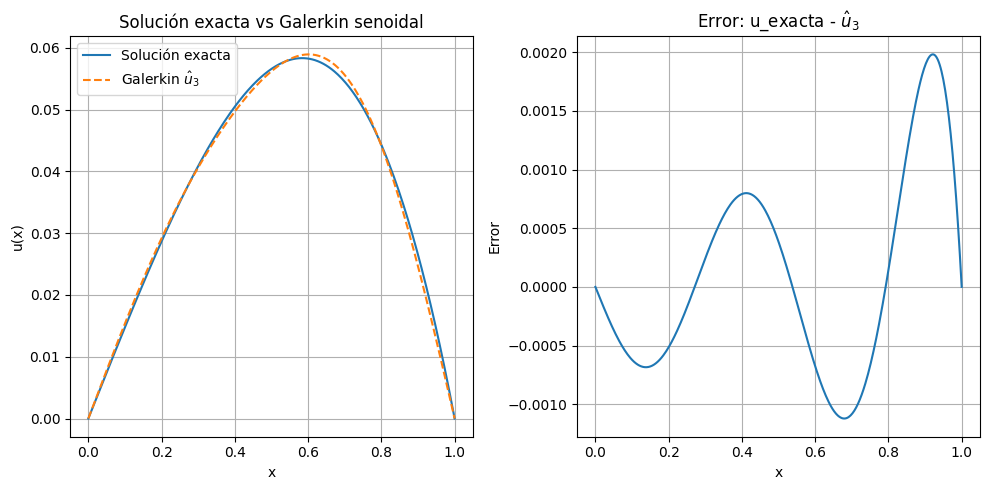

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(x_vals,u_exact_vals,label='Solución exacta')
plt.plot(x_vals,u_g_vals,'--',label='Galerkin $\\hat{u}_3$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solución exacta vs Galerkin senoidal')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x_vals,error_vals)
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error: u_exacta - $\\hat{u}_3$')
plt.grid(True)

plt.tight_layout()
plt.show()